In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import files
files.upload()
df = pd.read_csv('Electric_Production.csv')
df.head()

Saving Electric_Production.csv to Electric_Production.csv


,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [ ]:
df.set_index('DATE', inplace = True)

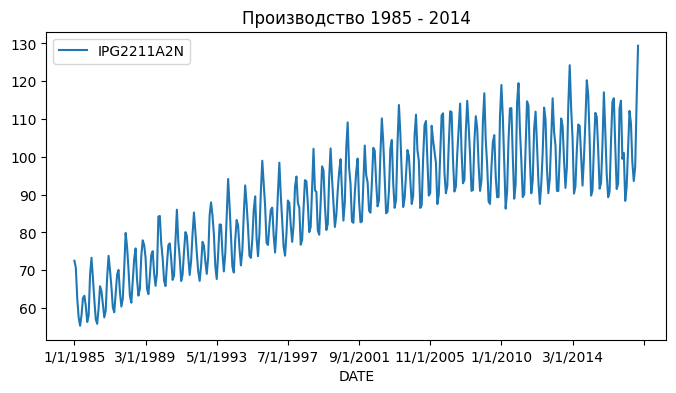

In [ ]:
df.plot(figsize = (8,4))
plt.title('Производство 1985 - 2014')
plt.show()

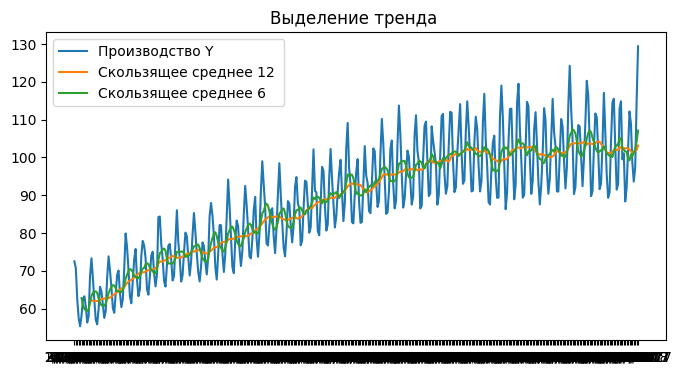

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(df, label = 'Производство Y')
plt.plot(df.rolling(window = 12).mean(), label = 'Скользящее среднее 12 ')
plt.plot(df.rolling(window = 6).mean(), label = 'Скользящее среднее 6 ')
plt.title('Выделение тренда ')
plt.legend()
plt.show()


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

In [ ]:
df.index = pd.to_datetime(df.index)

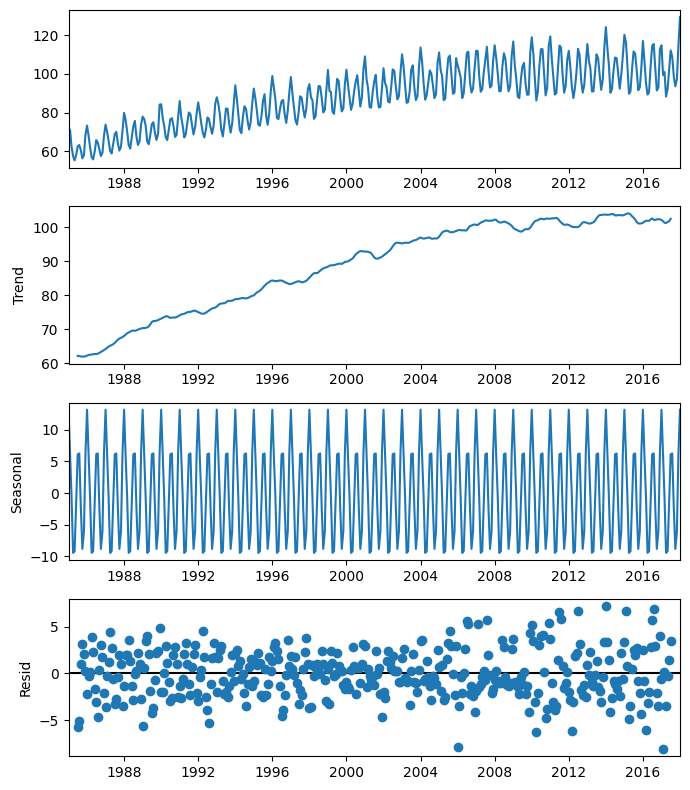

In [ ]:
decompose = seasonal_decompose(df ,model='additive')
rcParams['figure.figsize'] = 7, 8
decompose.plot()
plt.show()

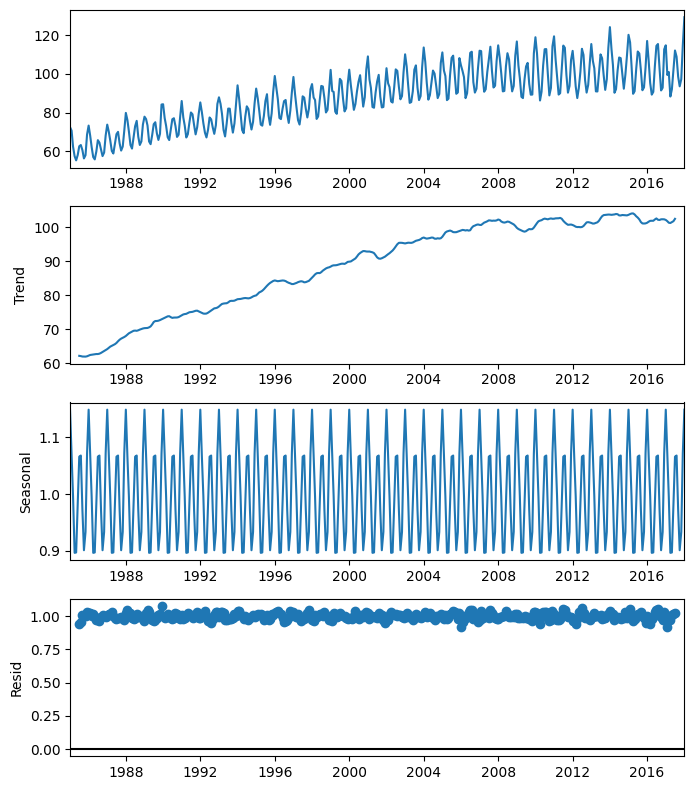

In [ ]:
decompose = seasonal_decompose(df ,model='multiplicative')
rcParams['figure.figsize'] = 7, 8
decompose.plot()
plt.show()

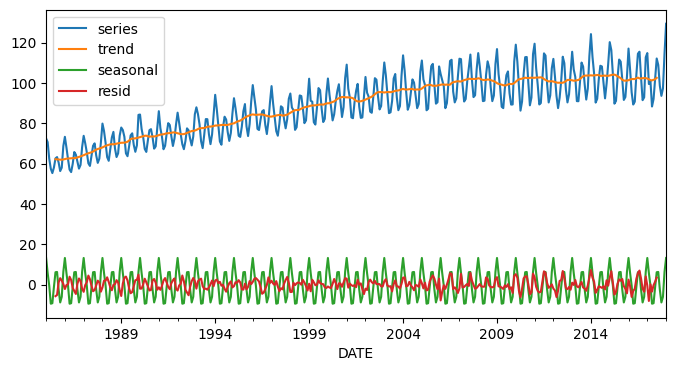

In [ ]:
decompose = seasonal_decompose(df)
plt.figure(figsize = (8,4))
decompose.observed.plot(label='series')
decompose.trend.plot()
decompose.seasonal.plot()
decompose.resid.plot()
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['IPG2211A2N'])
print('p-value = ' + str(adf_test[1]))
if adf_test[1]>0.05:
  print ("ряд нестационарный")
else:
  print("ряд стационарный")

p-value = 0.1862146911658712
ряд нестационарный


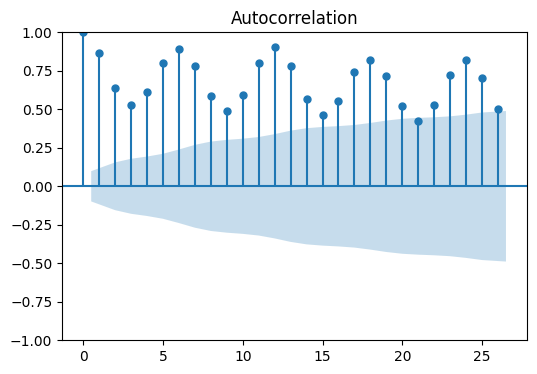

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
rcParams['figure.figsize'] = 6, 4
plot_acf(df)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


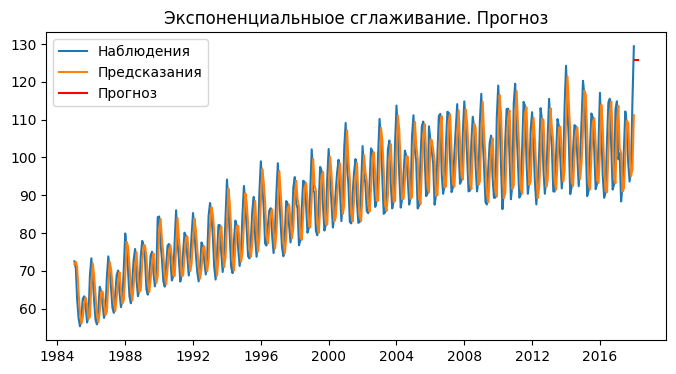

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#обучение
fit1=SimpleExpSmoothing(df, initialization_method="estimated").fit(smoothing_level=0.8)
# предсказание
fcast1 = fit1.forecast(3).rename(r"$\alpha=0.8$")
# иллюстрация Экспоненциального прогнозирования
plt.figure(figsize=(8, 4))
plt.plot(df, label='Наблюдения')
plt.plot(fit1.fittedvalues,label='Предсказания')
plt.plot(fcast1, label='Прогноз', color="red")
plt.title('Экспоненциальныое сглаживание. Прогноз')
plt.legend()
plt.show()

In [ ]:
print(mean_squared_error(df, fit1.fittedvalues))

68.84912394834151


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


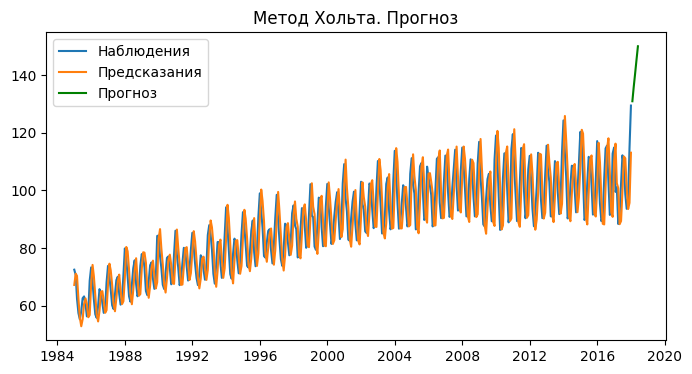

In [ ]:
fitH1 = Holt(df, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcastH1 = fitH1.forecast(5).rename("Holt's linear trend")
plt.figure(figsize=(8, 4))
plt.plot(df, label='Наблюдения')
plt.plot(fitH1.fittedvalues,label='Предсказания')
plt.plot(fcastH1, label='Прогноз', color='green')
plt.title('Метод Хольта. Прогноз')
plt.legend()
plt.show()

In [ ]:
train = df[:'2014-12']
test = df['2015-01':]
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2015-01-01 to 2018-01-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IPG2211A2N  37 non-null     float64
dtypes: float64(1)
memory usage: 592.0 bytes


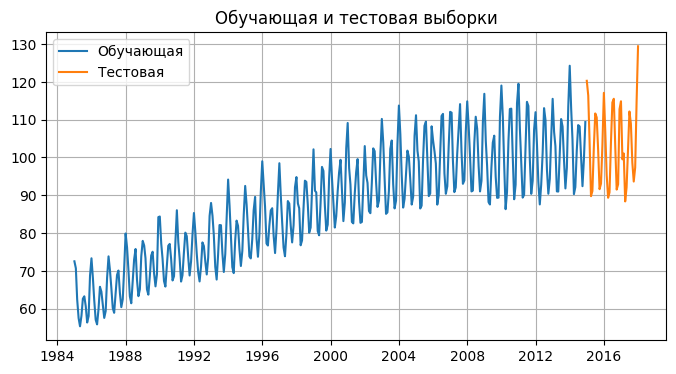

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(train, label='Обучающая')
plt.plot(test, label='Тестовая')
plt.title('Обучающая и тестовая выборки')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
order = (3, 0, 0),
seasonal_order = (0, 1, 0, 12))
# подгонка
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
start = len(train)
end = len(train) + len(test) - 1

In [ ]:
predictions = result.predict(start, end)
predictions

2015-01-01    121.542064
2015-02-01    112.064437
2015-03-01    103.808241
2015-04-01     89.296663
2015-05-01     91.474722
2015-06-01    101.403286
2015-07-01    108.148284
2015-08-01    107.877491
2015-09-01    100.178555
2015-10-01     92.197482
2015-11-01     99.556524
2015-12-01    109.233741
2016-01-01    121.453653
2016-02-01    111.995443
2016-03-01    103.754450
2016-04-01     89.254808
2016-05-01     91.442131
2016-06-01    101.377892
2016-07-01    108.128507
2016-08-01    107.862091
2016-09-01    100.166561
2016-10-01     92.188140
2016-11-01     99.549248
2016-12-01    109.228075
2017-01-01    121.449239
2017-02-01    111.992006
2017-03-01    103.751773
2017-04-01     89.252723
2017-05-01     91.440507
2017-06-01    101.376627
2017-07-01    108.127521
2017-08-01    107.861323
2017-09-01    100.165963
2017-10-01     92.187674
2017-11-01     99.548885
2017-12-01    109.227792
2018-01-01    121.449019
Freq: MS, Name: predicted_mean, dtype: float64

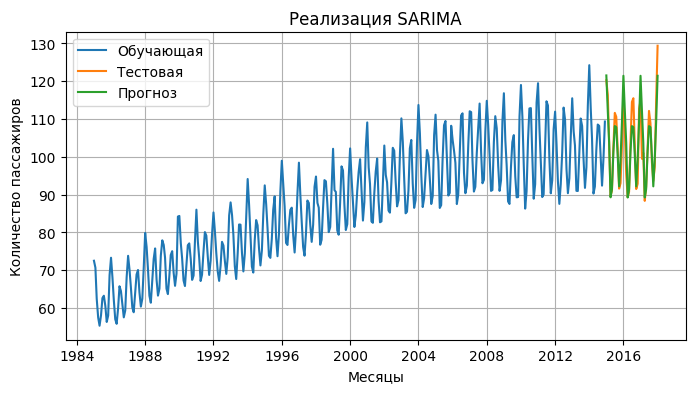

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(train, label='Обучающая')
plt.plot(test, label='Тестовая')
plt.plot(predictions, label='Прогноз')
plt.legend()
plt.title("Реализация SARIMA")
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.grid()
plt.show()